# Introduction

This dataset was sourced from Kaggle and includes YouTube trending data for various countries. In this project, I'll be analyzing data from specifically Great Britain and determining the answer to the following questions From the data.
1. According to this dataset, which channel has the most trending videos?
2. Which time of the day are trending videos most likely to be published?
3. Can a video's number of likes be predicted from the number of views and number of comments using Multiple Linear Regression?


As usual, this data will need to be thoroughly cleaned and processed before any modelling or statistical analysis. The structure of this analysis will be ask, prepare, process, analyze, share and act.  

In [387]:
import pandas as pd

# Import the data

In [388]:
gb = pd.read_csv('GBvideos.csv')

In [389]:
gb.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [390]:
gb.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

# Clean the data 

In [391]:
#Convert the publish time and trending date to datetime
gb.publish_time = pd.to_datetime(gb.publish_time)
gb.trending_date = pd.to_datetime(gb['trending_date'], format='%y.%d.%m')

In [392]:
gb.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
dtype: int64

In [393]:
features_to_remove = ['thumbnail_link', 'comments_disabled', 'video_id']
gb.drop(labels=features_to_remove, inplace=True, axis=1)

# Exploratory Data Analysis 

In [394]:
# import libraries for visualisation 
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np 

In [395]:
pd.options.display.float_format = "{:.2f}".format
gb.describe()

,category_id,views,likes,dislikes,comment_count
count,38916.00,38916.00,38916.00,38916.00,38916.00
mean,16.83,5911943.63,134519.55,7612.56,13088.35
std,7.75,19001209.95,349989.31,50956.83,50667.40
min,1.00,851.00,0.00,0.00,0.00
25%,10.00,251527.25,5897.00,200.00,679.00
50%,20.00,981889.00,25182.50,821.00,2478.00
75%,24.00,3683628.50,114089.25,3357.50,9241.50
max,43.00,424538912.00,5613827.00,1944971.00,1626501.00


A quick overview of the data tells us that the mean number of likes is 134,519.55 and that 75% of the videos have less than 114,089.25 likes. The median has 25,182.50 likes. This suggests that a large proportion of the data is clustered between 0 - 25,000. With half the data far more evenly distributed above this range. Clearly, the data has a very high standard deviation and so will need to be filtered to make model more accurate. At the moment, the dataset has 38916 observations. Visualizing the data with a histogram will make its distribution much clearer.


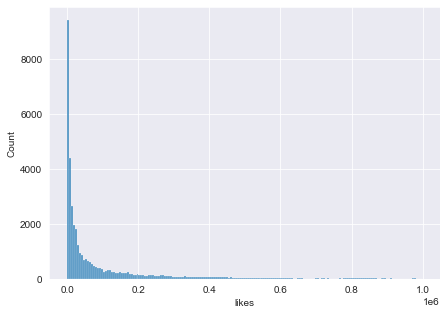

In [418]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(x = 'likes', data=gb[gb['likes'] < 1000000]);

As the histogram states above, the standard deviation of the number of likes is enormous, as well as being skewed to the right. This may prove problematic for the model and so will be addressed later. There seem to be a large number of outliers. We'll now have a more focused look at the data by focusing on videos with fewer than 100,000 likes. 

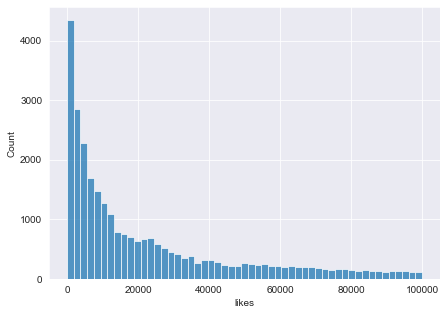

In [421]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(x = 'likes', data=gb[gb['likes'] < 100000]);

As we can see, the data has the highest number of videos with many fewer likes. The more likes a video has, the less likely it is to appear in the dataset. 
Now, using the corr method on the DataFrame, I'll see which features correlate most with the dependent variable, likes. Views will be my target variable since I'll be trying to predict the number of views of a video later. First, I'll look at exploring the timeseries data of the dataset. 

### Which time of the day is most popular for publishing videos?
Firstly, it's important to see when the earliest date is for published videos and when the latest date is. The earliest date is in fact 5th March 2007. This is much later than I anticipated. The latest date, on the other hand is, 13th June 2018. That's a range of 4117 days, equating to just over 11 years. From the graph below, it's clear that the most popular time to publish a video, according to the dataset is at 5pm. The least popular time being 6/7am. A trend worth mentioning is that after 11am, the number of videos published begins to steadily rise, until it gets to 5pm, where the number of videos then begins its descent. 

In [443]:
gb.publish_time.max() - gb.publish_time.min()


Timedelta('4117 days 20:48:01')

<AxesSubplot:xlabel='publish_time'>

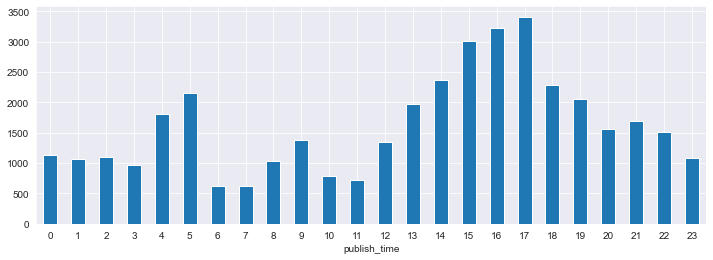

In [459]:
fig, axs = plt.subplots(figsize=(12, 4))

gb.groupby(gb["publish_time"].dt.hour).size().plot(kind='bar', rot=0, ax=axs)

### According to this dataset, which channel has the most trending videos?



In [467]:
gb.channel_title.value_counts(ascending=False)

The Tonight Show Starring Jimmy Fallon    208
Jimmy Kimmel Live                         207
TheEllenShow                              207
Saturday Night Live                       206
WWE                                       205
                                         ... 
Kylo Ren                                    1
Videomusicawards                            1
Pop Blast                                   1
Dale Dai                                    1
5-Minute Crafts                             1
Name: channel_title, Length: 1625, dtype: int64

According to the dataset, the Tonight Show Starring Jimmy Fallon has the highest number of trending videos,
followed by Jimmy Kimmel Live, then the Ellen Show. Clearly, talkshow hosts are the talking points of UK Youtube, since they grab the most trending videos. 

In [396]:
gb.corr()

,category_id,views,likes,dislikes,comment_count,ratings_disabled,video_error_or_removed
category_id,1.00,-0.17,-0.18,-0.02,-0.06,-0.06,-0.01
views,-0.17,1.00,0.80,0.39,0.47,0.01,0.01
likes,-0.18,0.80,1.00,0.45,0.74,-0.03,0.01
dislikes,-0.02,0.39,0.45,1.00,0.77,-0.01,0.01
comment_count,-0.06,0.47,0.74,0.77,1.00,-0.02,0.00
ratings_disabled,-0.06,0.01,-0.03,-0.01,-0.02,1.00,-0.00
video_error_or_removed,-0.01,0.01,0.01,0.01,0.00,-0.00,1.00


The variable with the highest correlation to views is likes. This makes sense given that a video would likely have more likes given the more views it receives.  It's worth mentioning that dislikes and likes have no significant correlation. This makes a lot of sense given YouTube videos are either largely popular or predominantly, unpopular. I'll now use a heatmap to better illustrate the correlations of variables

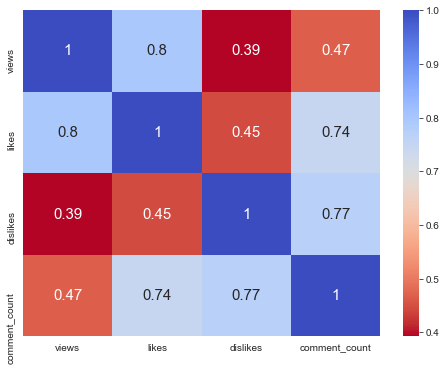

In [397]:
fig, ax = plt.subplots(figsize=(8,6))
heat_map_variables = gb[['views', 'likes', 'dislikes', 'comment_count']]
sns.heatmap(heat_map_variables.corr(),annot=True,cmap='coolwarm_r', annot_kws={'size': 15});

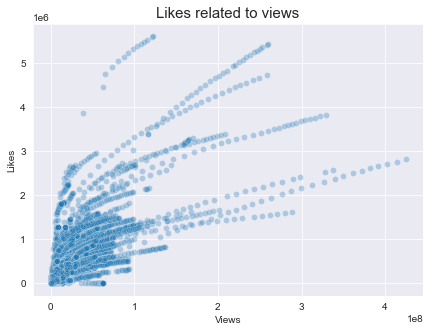

In [398]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('darkgrid')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Likes related to views', size=15)
sns.scatterplot(x = 'views', y = 'likes', data=gb, alpha=.3);

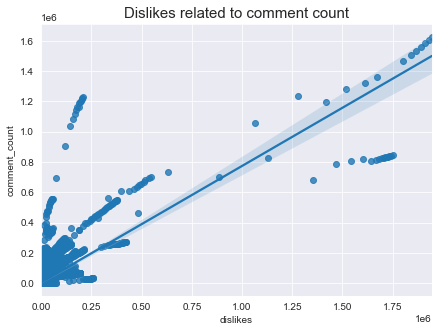

In [409]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.xlabel('Dislikes')
plt.ylabel('Comment_count')
plt.title('Dislikes related to comment count', size=15)
sns.regplot(x = 'dislikes', y = 'comment_count', data=gb);

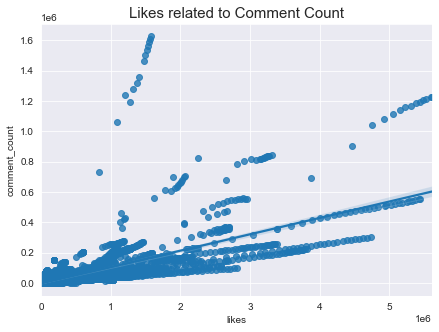

In [400]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_style('darkgrid')
plt.xlabel('Likes')
plt.ylabel('Comment Count')
plt.title('Likes related to Comment Count', size=15)
sns.regplot(x = 'likes', y = 'comment_count', data=gb);

As shown above, the relationship between likes and comment count is somewhat linear. However, there are some videos that have few views though receive disproportionately a lot of comments.  

# Data Selection
The independent variables chosen to predict likes are views and number of comments. Both have a relatively high correlation and so should lead to an accurate model. But we will see! Their correlation scores with likes are 0.8 and 0.74, respectively.

In [422]:
features = gb[['views', 'comment_count']]
likes = gb['likes']

In [423]:
# Split the data into train and test sections, with an 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, likes, test_size = 0.2, random_state = 1)

In [424]:
from sklearn.linear_model import LinearRegression

# instigate the model object 
model = LinearRegression()

# train the model on the training data 
model.fit(X_train, y_train)

LinearRegression()

# Evaluating the model 
The first method I'll use to evaluate the model is the score method, which produces an R^2 for the model. It's worth mentioning that the R^2 score evaluates how well model fits the observed data. In this case, the training data. The score suggests that roughly 80 percent of the data fits the regression model. Whilst not an absolute determiner of how good the model is, it is a promising score. Of the features, it would appear the views is the most predictive, followed by comment_count. 

In [425]:
model.score(X_train, y_train)

0.8087096442296271

In [426]:
model.score(X_test, y_test)

0.8198464829043315

In [427]:
sorted(list(zip(['views','comment_count'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('comment_count', 3.3174626968219685), ('views', 0.010489033862125512)]

Now, moving onto predicting the number of likes for the test data, where I can then compare them to the actual values for the test data. The perfect model would have homoscedasticity, where x = y.

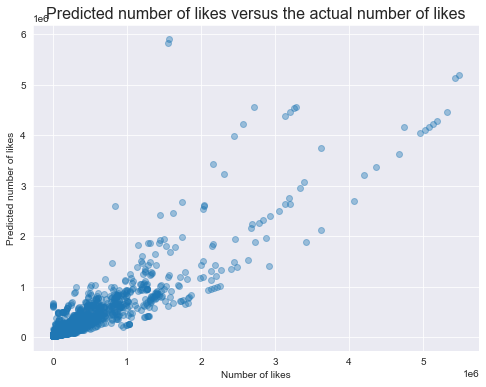

In [428]:
fig, ax = plt.subplots(figsize=(8, 6))
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.title('Predicted number of likes versus the actual number of likes', size=16)
plt.xlabel('Number of likes')
plt.ylabel('Predicted number of likes');

### Takewaways
Overall, the model was able to predict the number of likes with a reasonably high degree of accuracy. There are some limitations with the data however which makes the model less accurate than possible. 

* The videos are from UK trending list and only therefore the sampling has a bias towards data from the UK, as opposed to global trending videos. 
* The data is from 2017 and therefore other is less informative than data from the present year. 

Some further analysis could be done to answer the following questions.
* Which tags are the most frequent tags?
* In which months are videos most likely to trend?

Overall, the analysis proved that number of likes could be predicted with a R^2 of 0.81, which is quite high. Furthermore, the videos are published most often at 5pm during the day. 